In [1]:
from keras.datasets import mnist

In [2]:
# MNIST データセットの読み込み
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from keras import models
from keras import layers

In [10]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [11]:
network.compile(optimizer='rmsprop',
                               loss='categorical_crossentropy',
                               metrics=['accuracy'])

In [12]:
# データの前処理
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [13]:
# ラベルをカテゴリ値でエンコード
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
# ネットワークのトレーニング
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.2535 - acc: 0.9276
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.1041 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0681 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0496 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.0375 - acc: 0.9887


In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 56us/step
test_acc: 0.9805


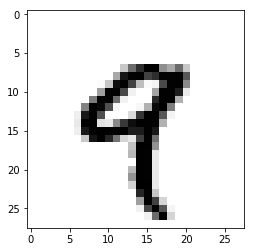

In [21]:
# ４つ目の数字を表示
digit = train_images[4].reshape((28,28))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [22]:
# Functional APIでの定義
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [23]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                         loss='mse',
                         metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0207 - acc: 0.8758
Epoch 2/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.0106 - acc: 0.9326
Epoch 3/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.0088 - acc: 0.9446
Epoch 4/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0076 - acc: 0.9528
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0068 - acc: 0.9573
